In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
df_raw= pd.read_csv(r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\data\raw_analyst_ratings\raw_analyst_ratings.csv', parse_dates=['date'])

In [3]:
AAPL_data = pd.read_csv(r"C:\Users\ephre\Documents\Financial News and Stock Price Integration\data\yfinance_data\AAPL_historical_data.csv", parse_dates=['Date'])

In [4]:
AAPL_data.rename(columns={'Date': 'date'}, inplace=True)

In [5]:
print(df_raw.isnull().sum().sum())
print(AAPL_data.isnull().sum().sum())

0
0


In [6]:
print(df_raw.info())
print(AAPL_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       
 3   Low           10998 non-null  float64       
 4   Close         10998 non-null  float64       
 5   Adj Close     10998 non-null  flo

In [7]:
df_raw["headline_length"] = df_raw["headline"].apply(len)
df_raw["headline_length"]

0          39
1          42
2          29
3          44
4          87
           ..
1407323    38
1407324    52
1407325    56
1407326    54
1407327    81
Name: headline_length, Length: 1407328, dtype: int64

In [8]:
df_raw.head(4)

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44


In [9]:
article_counts = df_raw.groupby('publisher').size()
article_counts.sort_values(ascending=False)

publisher
Paul Quintaro             228373
Lisa Levin                186979
Benzinga Newsdesk         150484
Charles Gross              96732
Monica Gerson              82380
                           ...  
White Diamond Research         1
Michael Zanger                 1
Stock Market Newz              1
Forexpros.com                  1
Jim Pearce                     1
Length: 1034, dtype: int64

In [10]:
df_raw["headline_length"] = df_raw["headline"].apply(len)

In [11]:
df_raw['date'] = pd.to_datetime(df_raw['date'], format='mixed', utc=True)

In [12]:
daily_headlines = df_raw.groupby('date').size()
daily_headlines

date
2009-02-14 00:00:00+00:00    1
2009-04-27 00:00:00+00:00    2
2009-04-29 00:00:00+00:00    1
2009-05-22 00:00:00+00:00    1
2009-05-27 00:00:00+00:00    6
                            ..
2020-06-11 20:49:41+00:00    1
2020-06-11 20:51:33+00:00    1
2020-06-11 21:01:39+00:00    1
2020-06-11 21:11:20+00:00    1
2020-06-11 21:12:35+00:00    1
Length: 39956, dtype: int64

In [13]:
sentiment_data=df_raw.copy()
sia = SentimentIntensityAnalyzer()

In [14]:
sentiment_data['sentiment'] = sentiment_data['headline'].apply(lambda x: sia.polarity_scores(text=x)['compound'])
# Categorize the sentiment scores
sentiment_data['sentiment_category'] = pd.cut(sentiment_data['sentiment'], bins=[-1, -0.0001, 0 ,0.5, 1], labels=['Negative', 'Neutral', 'Positive', 'Very Positive'])
sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,sentiment,sentiment_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,0.0000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,0.0000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,0.0000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,0.0000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,0.2960,Positive
...,...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00+00:00,ZX,38,0.2023,Positive
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00+00:00,ZX,52,-0.3818,Negative
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00+00:00,ZX,56,0.0000,Neutral
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00+00:00,ZX,54,0.0000,Neutral


In [15]:
sentiment_data['sentiment_category'].value_counts()

sentiment_category
Neutral          731893
Positive         339022
Negative         226695
Very Positive    109718
Name: count, dtype: int64

In [16]:
AAPL_data['date'] = pd.to_datetime(AAPL_data['date'])
AAPL_data['date'] = AAPL_data['date'].dt.strftime('%Y-%m-%d')

In [17]:
sentiment_data['date'] = sentiment_data['date'].dt.strftime('%Y-%m-%d')

In [18]:
sentiment_data.set_index('date', inplace=True)
sentiment_data.sample(5)

,Unnamed: 0,headline,url,publisher,stock,headline_length,sentiment,sentiment_category
date,,,,,,,,
2015-09-18,157255,The Longest Dividend-Paying REITs In The U.S.,https://www.benzinga.com/trading-ideas/long-id...,GilverBook,BHP,45,0.0000,Neutral
2018-03-09,882952,Gabelli Upgrades Navistar Following Beat-And-R...,https://www.benzinga.com/analyst-ratings/analy...,Shanthi Rexaline,NAV,58,0.0000,Neutral
2015-11-05,1276217,Bank of America Downgrades Time Warner to Neutral,https://www.benzinga.com/news/15/11/5962686/ba...,Paul Quintaro,TWX,49,0.0000,Neutral
2020-01-13,666387,Infinity Pharmaceuticals Sees FY20 Net Loss $4...,https://www.benzinga.com/general/biotech/20/01...,Benzinga Newsdesk,INFI,82,-0.3182,Negative
2016-03-09,232299,"Dir Subramaniam Buys 5,000 Shares Of Citizens ...",https://www.benzinga.com/news/16/03/7655174/di...,Charles Gross,CFG,83,0.2960,Positive


In [19]:
AAPL_data.set_index('date', inplace=True)
AAPL_data.sample(5)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
2022-02-03,174.479996,176.240005,172.119995,172.899994,170.300568,89418100,0.0,0.0
2019-02-22,42.895000,43.250000,42.845001,43.242500,41.525047,75652800,0.0,0.0
1984-04-19,0.125000,0.126674,0.123884,0.126116,0.097223,123401600,0.0,0.0
2013-09-12,16.732143,16.978571,16.643213,16.881786,14.658587,404051200,0.0,0.0
2005-02-08,1.411964,1.453214,1.406964,1.444643,1.219965,890019200,0.0,0.0


In [20]:
AAPL_data['Daily Returns'] = AAPL_data['Close'].pct_change()

In [21]:
aligned_data = pd.merge(AAPL_data, sentiment_data, left_index=True, right_index=True, how='inner')
aligned_data.head(4)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Daily Returns,Unnamed: 0,headline,url,publisher,stock,headline_length,sentiment,sentiment_category
date,,,,,,,,,,,,,,,,,
2009-04-27,4.389286,4.464286,4.380714,4.454643,3.761836,480690000,0.0,0.0,0.006699,522587,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,FT,45,0.0,Neutral
2009-04-27,4.389286,4.464286,4.380714,4.454643,3.761836,480690000,0.0,0.0,0.006699,1396488,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,Y,45,0.0,Neutral
2009-04-29,4.458929,4.530357,4.422500,4.469286,3.774201,458110800,0.0,0.0,0.010008,1834,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,A,22,0.0,Neutral
2009-05-22,4.430357,4.435000,4.348214,4.375000,3.694580,297998400,0.0,0.0,-0.013529,68387,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore CFA,AM,49,0.0,Neutral


Correlation between sentiment and daily stock returns: 0.0476474665370319


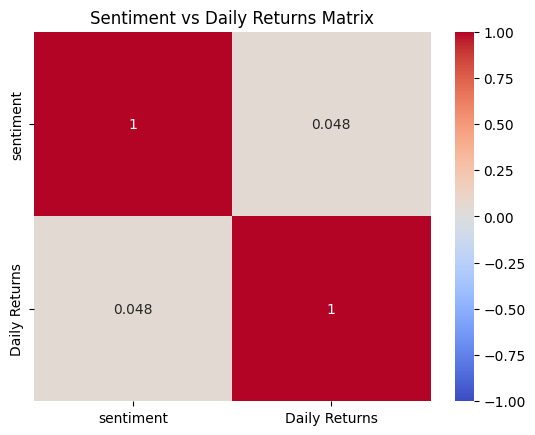

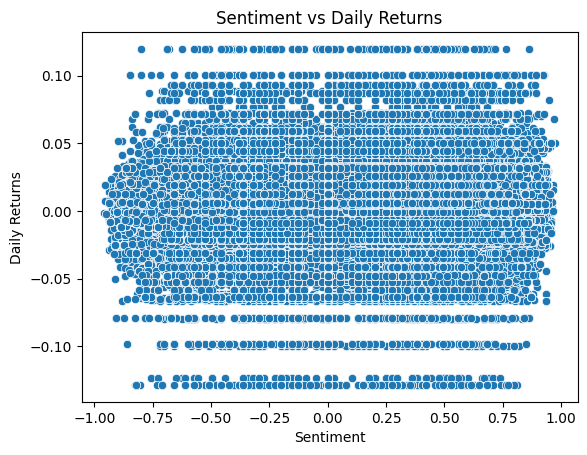

In [22]:
correlation = aligned_data['sentiment'].corr(aligned_data ['Daily Returns'])
print("Correlation between sentiment and daily stock returns:", correlation)

correlation_matrix = aligned_data[['sentiment', 'Daily Returns']].corr()

# Plot the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sentiment vs Daily Returns Matrix')
plt.show()

# Scatterplot to visualize the relationship between sentiment and closing price
sns.scatterplot(x='sentiment', y='Daily Returns', data=aligned_data)
plt.title('Sentiment vs Daily Returns')
plt.xlabel('Sentiment')
plt.ylabel('Daily Returns')
plt.show()

Correlation between sentiment and daily stock returns: -0.009085390093111663


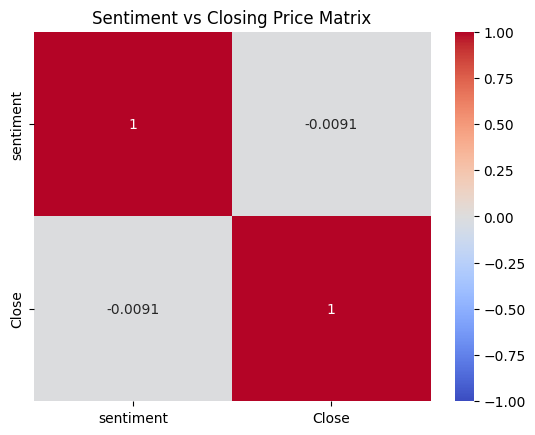

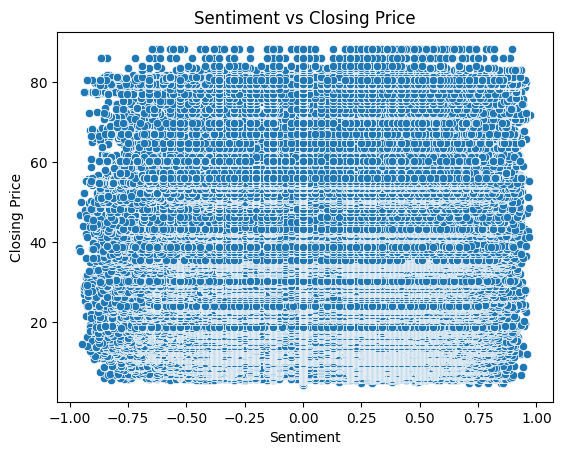

In [23]:
correlation = aligned_data['sentiment'].corr(aligned_data ['Close'])
print("Correlation between sentiment and daily stock returns:", correlation)

correlation_matrix = aligned_data[['sentiment', 'Close']].corr()

# Plot the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sentiment vs Closing Price Matrix')
plt.show()

# Scatterplot to visualize the relationship between sentiment and closing price
sns.scatterplot(x='sentiment', y='Close', data=aligned_data)
plt.title('Sentiment vs Closing Price')
plt.xlabel('Sentiment')
plt.ylabel('Closing Price')
plt.show()

Correlation between sentiment and daily stock returns: -0.009810672821413962


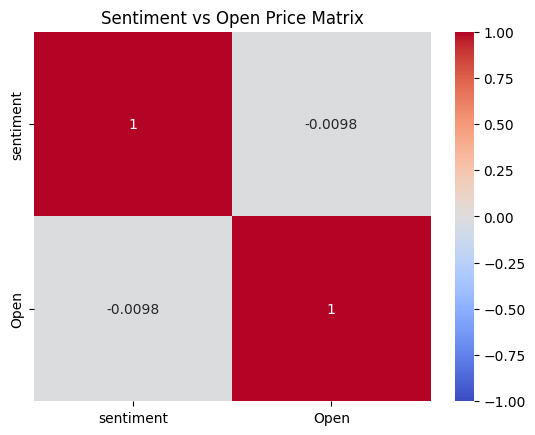

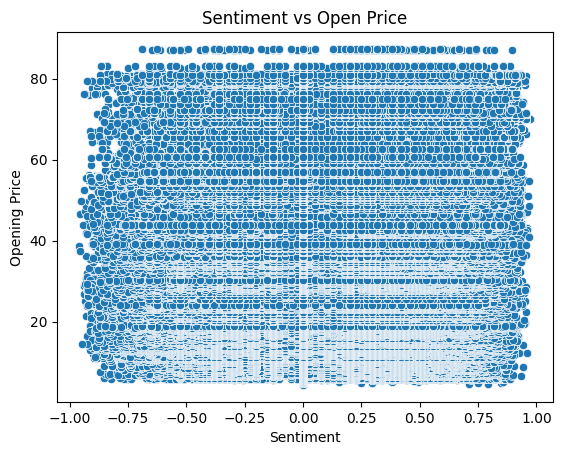

In [24]:
correlation = aligned_data['sentiment'].corr(aligned_data ['Open'])
print("Correlation between sentiment and daily stock returns:", correlation)

correlation_matrix = aligned_data[['sentiment', 'Open']].corr()

# Plot the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sentiment vs Open Price Matrix')
plt.show()

# Scatterplot to visualize the relationship between sentiment and closing price
sns.scatterplot(x='sentiment', y='Open', data=aligned_data)
plt.title('Sentiment vs Open Price')
plt.xlabel('Sentiment')
plt.ylabel('Opening Price')
plt.show()

Correlation between sentiment and daily stock returns: -0.010520986579385152


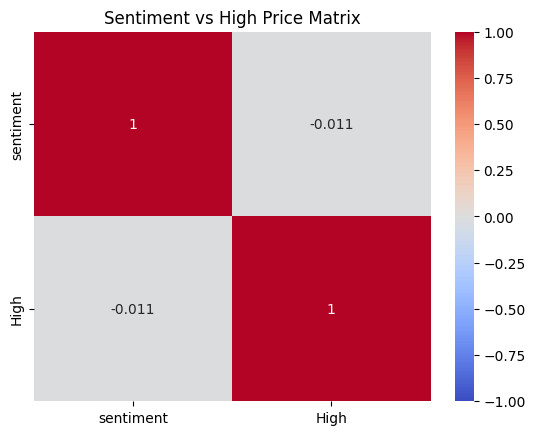

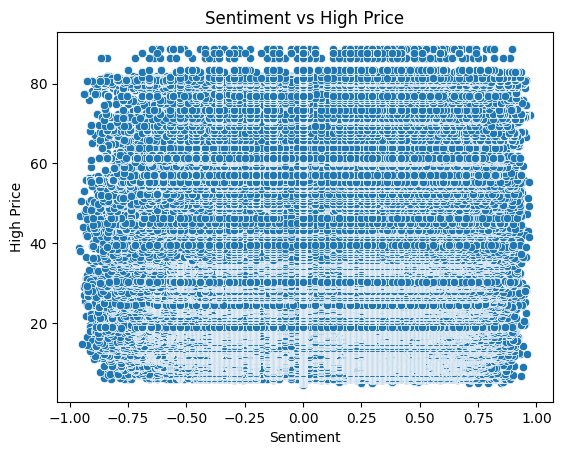

In [25]:

correlation = aligned_data['sentiment'].corr(aligned_data ['High'])
print("Correlation between sentiment and daily stock returns:", correlation)

correlation_matrix = aligned_data[['sentiment', 'High']].corr()

# Plot the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sentiment vs High Price Matrix')
plt.show()

# Scatterplot to visualize the relationship between sentiment and closing price
sns.scatterplot(x='sentiment', y='High', data=aligned_data)
plt.title('Sentiment vs High Price')
plt.xlabel('Sentiment')
plt.ylabel('High Price')
plt.show()

Correlation between sentiment and daily stock returns: -0.008876766026884952


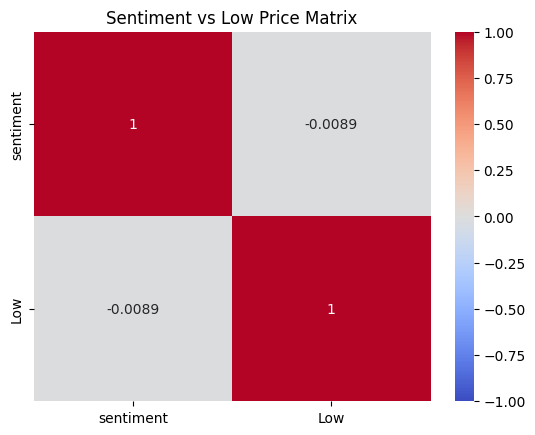

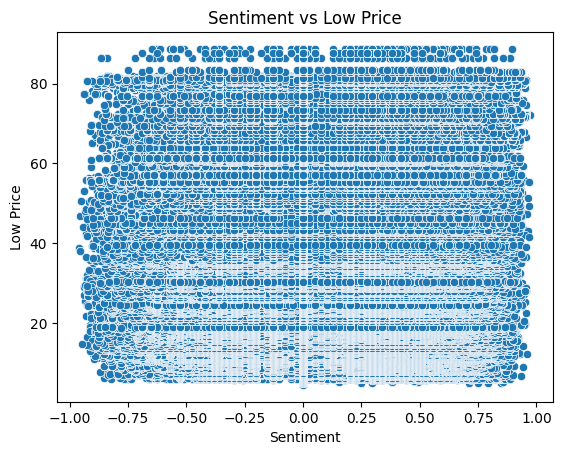

In [26]:
correlation = aligned_data['sentiment'].corr(aligned_data ['Low'])
print("Correlation between sentiment and daily stock returns:", correlation)

correlation_matrix = aligned_data[['sentiment', 'Low']].corr()

# Plot the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sentiment vs Low Price Matrix')
plt.show()

# Scatterplot to visualize the relationship between sentiment and closing price
sns.scatterplot(x='sentiment', y='High', data=aligned_data)
plt.title('Sentiment vs Low Price')
plt.xlabel('Sentiment')
plt.ylabel('Low Price')
plt.show()

Correlation between sentiment and daily stock returns: -0.009215807925297078


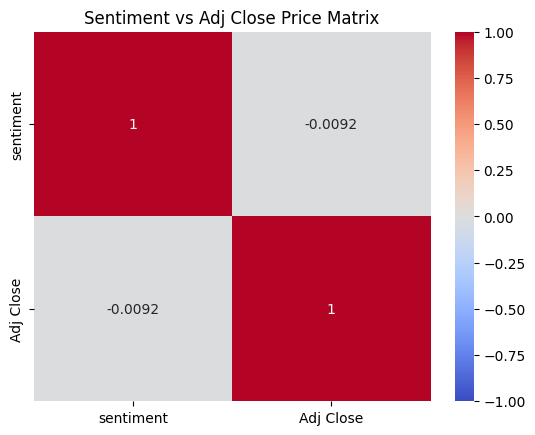

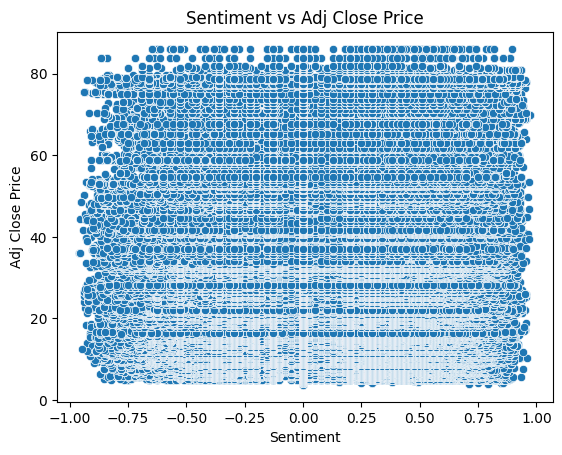

In [27]:
correlation = aligned_data['sentiment'].corr(aligned_data ['Adj Close'])
print("Correlation between sentiment and daily stock returns:", correlation)

correlation_matrix = aligned_data[['sentiment', 'Adj Close']].corr()

# Plot the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sentiment vs Adj Close Price Matrix')
plt.show()

# Scatterplot to visualize the relationship between sentiment and closing price
sns.scatterplot(x='sentiment', y='Adj Close', data=aligned_data)
plt.title('Sentiment vs Adj Close Price')
plt.xlabel('Sentiment')
plt.ylabel('Adj Close Price')
plt.show()